In [28]:
%matplotlib inline

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import qqplot

In [2]:
df = pd.read_excel('~/Downloads/member.xls')
df = df.loc[:, 'TNP': 'Height']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10118 entries, 0 to 10117
Data columns (total 13 columns):
TNP           10118 non-null int64
Region        10118 non-null object
Age           10064 non-null float64
Gender        10118 non-null int64
SS            10118 non-null int64
Rosvit        9557 non-null object
Postgrad      9169 non-null float64
Experience    7180 non-null float64
SocSt         9352 non-null float64
Branch        3715 non-null float64
Salary        4009 non-null float64
Weight        9351 non-null float64
Height        9350 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 1.0+ MB


In [3]:
results = ols('Age ~ C(Region)', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     11.27
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           2.63e-14
Time:                        19:02:05   Log-Likelihood:                -45334.
No. Observations:               10064   AIC:                         9.068e+04
Df Residuals:                   10056   BIC:                         9.074e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             41.2905      0.745     55.444      0.000      39.831      42.750
C(Region)[T.Chern]     4.0142      1.104      3.637      0.000       1.851       6.178
C(Region)[T.Dnipr]    -1.5802      0.919     -1.720      0.085      -3.381       0.220
C(Region)[T.Don]      -0.7888      0.888     -0.888      0.374      -2.529       0.952
C(Region)[T.Khark]    -0.1300      0.993     -0.131      0.896      -2.077       1.817
C(Region)[T.Lviv]     -4.2453      0.925     -4.590      0.000      -6.058      -2.432
C(Region)[T.Odess]    -1.5151      1.002     -1.511      0.131      -3.480       0.450
C(Region)[T.Vinn]     -1.6792      1.015     -1.654      0.098      -3.669       0.311
==============================================================================
Omnibus:                     2524.500   Durbin-Watson:                   1.437
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              448.143
Skew:                           0.095   Prob(JB):                     4.86e-98
Kurtosis:                       1.984   Cond. No.                         10.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
df['Region'].unique()

array(['Vinn', 'Dnipr', 'Don', 'Lviv', 'Odess', 'Khark', 'Cherk', 'Chern'],
      dtype=object)

F(7, 10056)=11.27, p~=2.63e-14, отже бачимо, що модель значуща
з p-value в таблиці видно, що різниця між группою Intercept - Cherk та группами Chern, Lviv - значуща, а іншими - ні

In [10]:
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Region),3.781133e+04,7.0,11.272362,2.634710e-14
Residual,4.818749e+06,10056.0,NaN,NaN


оскільки модель значуща, вона поясняє значну кількість відхилень (sum_sq = 3.2*10^5)  
рядок Residual вказує на несистематичні відхилення у даних (unexplained variance)

In [22]:
plt.rcParams['figure.figsize'] = (10,10)

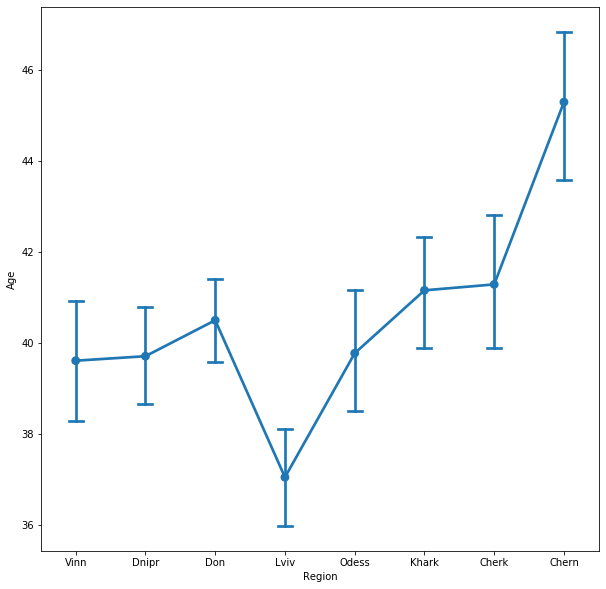

In [12]:
sns.pointplot(x='Region', y='Age', data=df, capsize=.2)

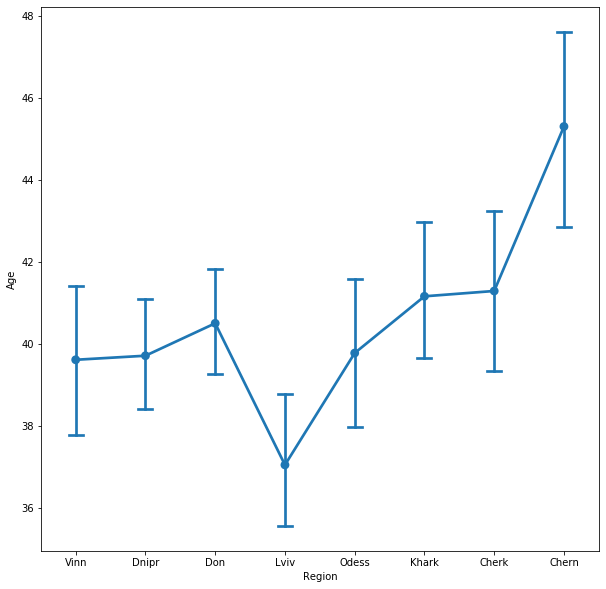

In [14]:
alpha_bonf = 0.05 / 8
sns.pointplot(x='Region', y='Age', data=df, capsize=.2, ci=100-alpha_bonf*100)

бачимо, що деякі інтервали середніх перетинаються

In [13]:
df = df[['Region', 'Age']].dropna()
stats.levene(df['Age'][df['Region'] == 'Vinn'],
            df['Age'][df['Region'] == 'Dnipr'],
            df['Age'][df['Region'] == 'Don'],
            df['Age'][df['Region'] == 'Lviv'],
            df['Age'][df['Region'] == 'Odess'],
            df['Age'][df['Region'] == 'Khark'],
            df['Age'][df['Region'] == 'Cherk'],
            df['Age'][df['Region'] == 'Chern'])

LeveneResult(statistic=1.9225931521534856, pvalue=0.06182139858350103)

p>0.05, тому можно вважати дисперсії однорідними

In [30]:
plt.rcParams['figure.figsize'] = (5,20)